In [211]:
# Import All Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [212]:
# Read Dataset
df = pd.read_csv("house_data.csv")

In [213]:
pd.set_option('display.max.columns',None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [214]:
df.shape

(21613, 21)

In [215]:
# Check Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [216]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [218]:
df.price.max()

7700000.0

In [219]:
df.price.min()

75000.0

Insights from basic checks
- There is no null value
- Targer value :- Price of home where Max price is 7700000.0 and min price is 75000.0

EDA :- Univariate/Bivariate Analysis

In [220]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [221]:
df1 = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15']]

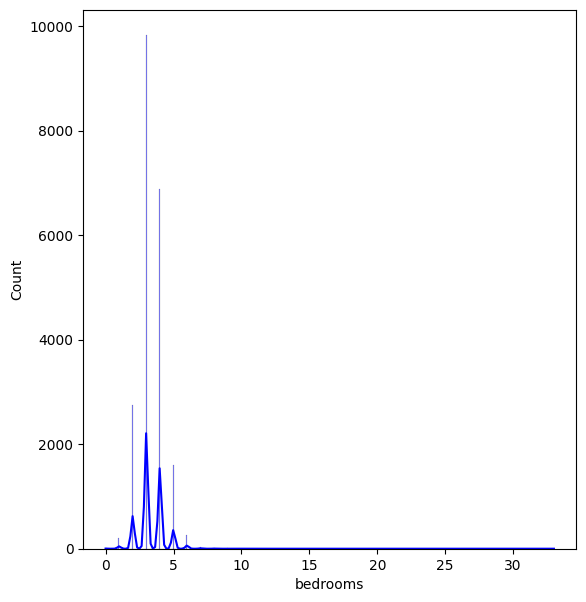

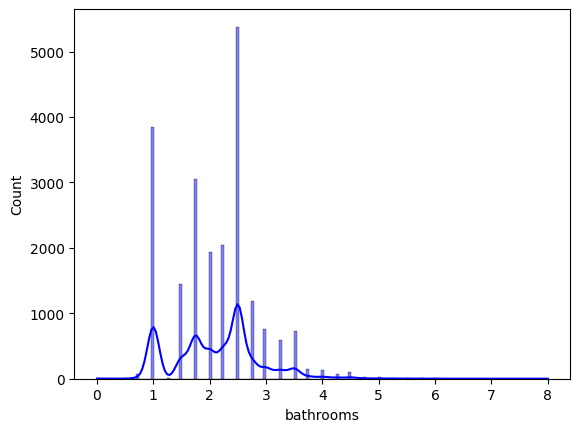

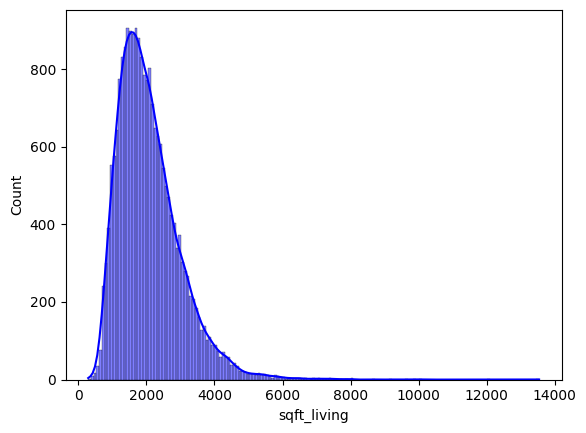

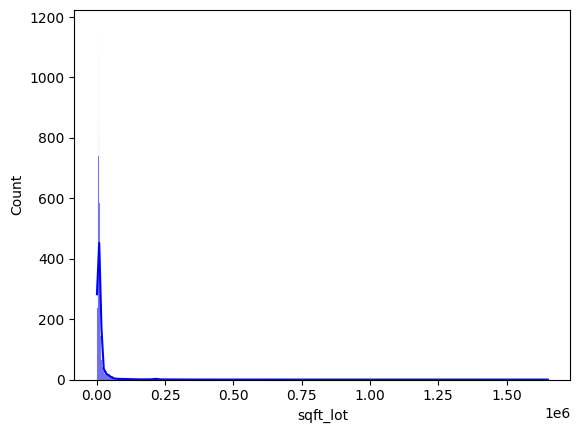

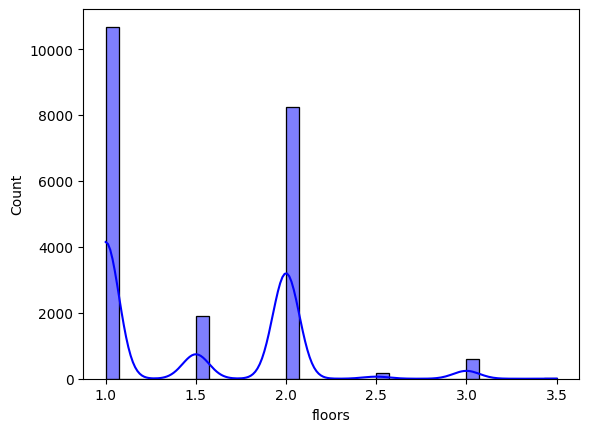

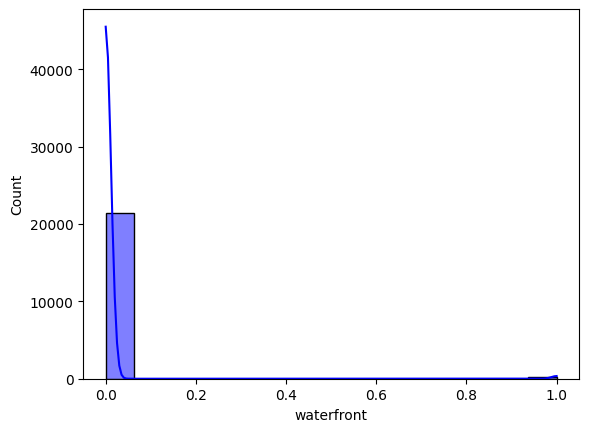

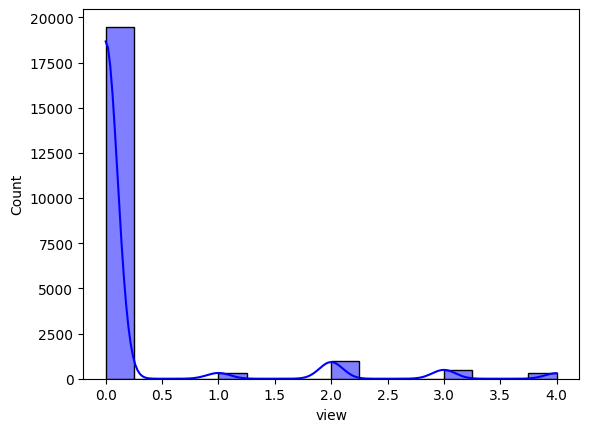

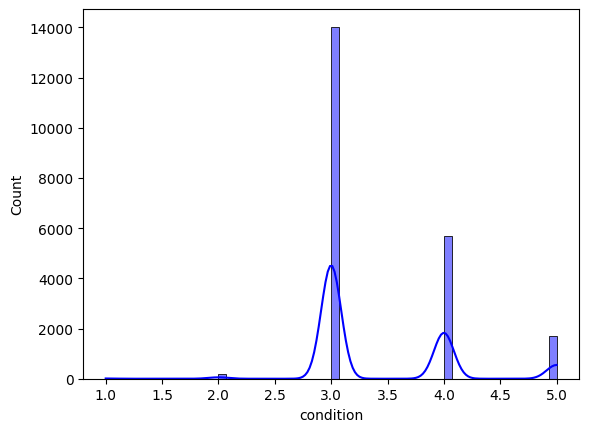

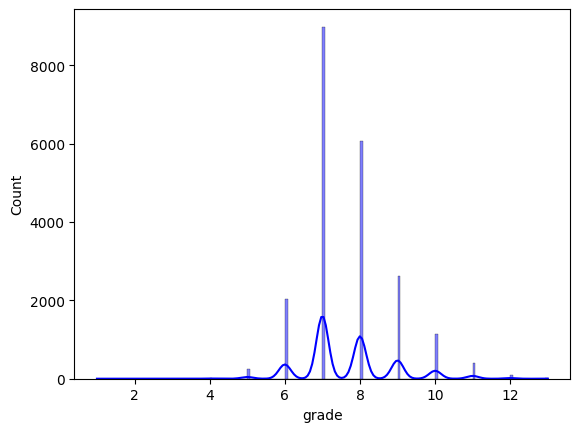

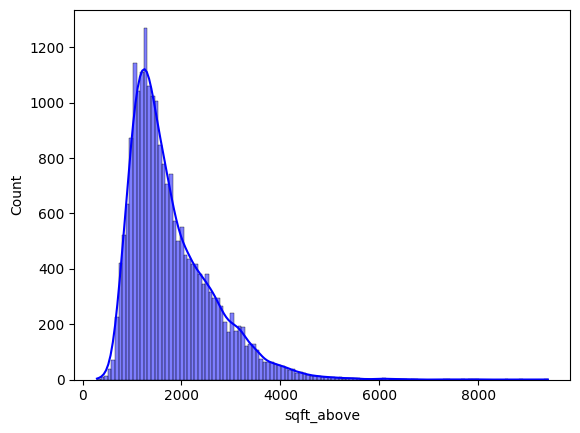

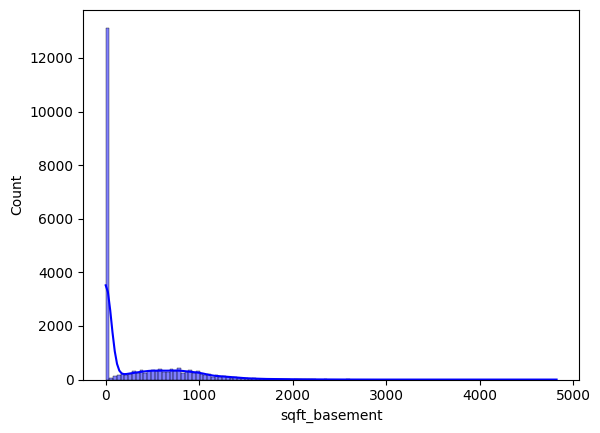

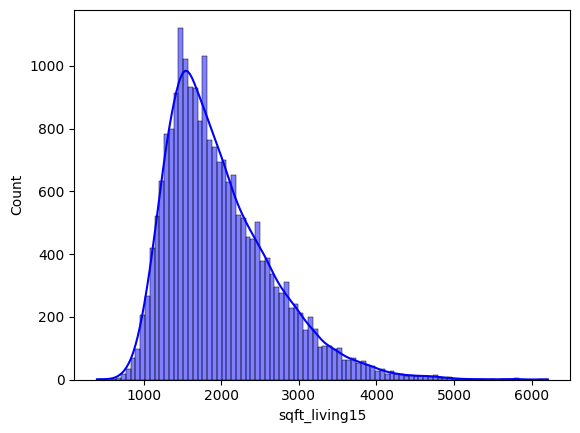

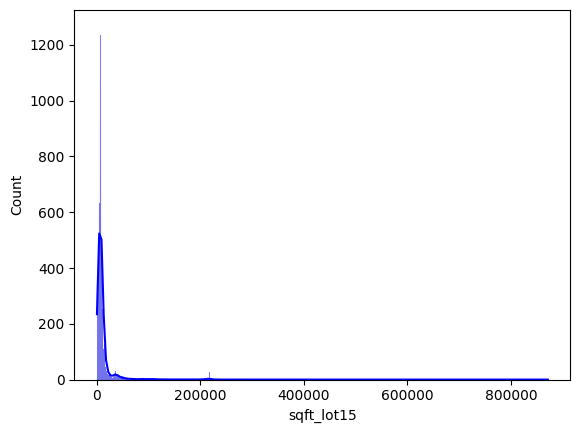

In [222]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
for i in df1:
    sns.histplot(x=df1[i],color='b',kde=True)
    plt.show()

Insights

- Most Houses have bedroom in range 2 to 4.
- Most of the houses are in 1 or 2 floor
- There are less number of house have waterfont.
- Maximum number of houses are built in between 2002 to 2005.
- Less number of house have good view.
- Maximum number of house price are within 1lakh

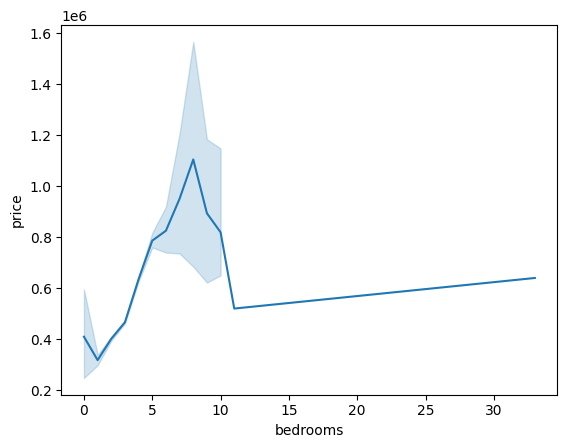

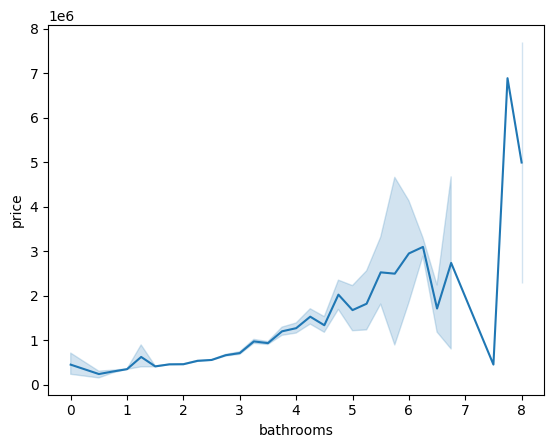

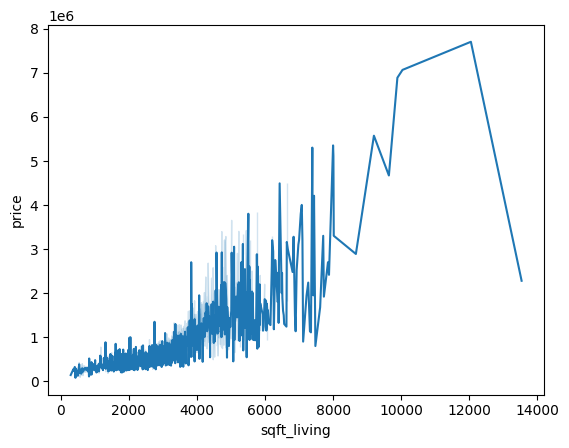

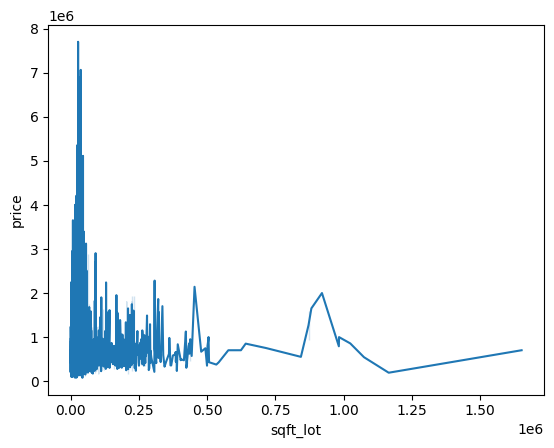

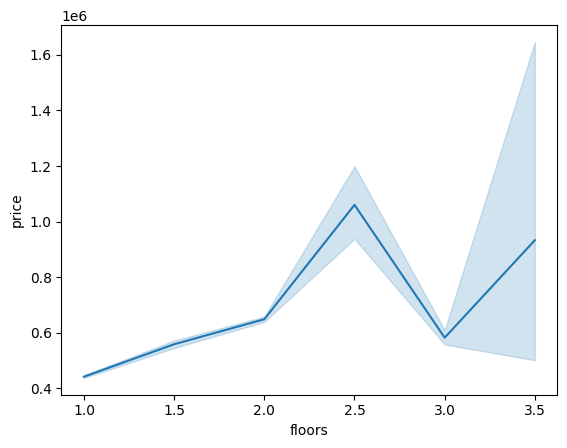

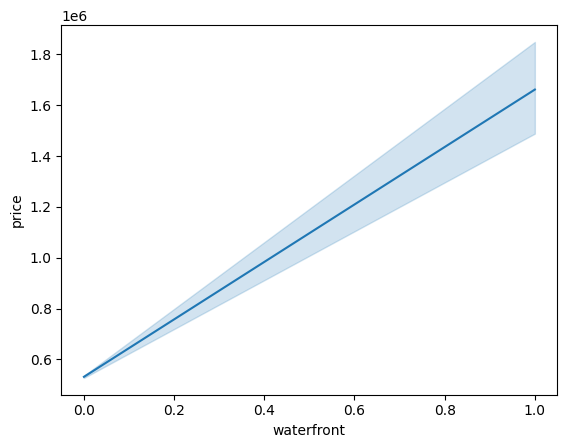

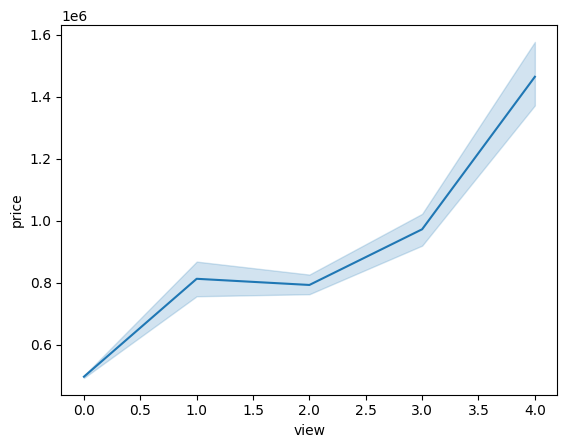

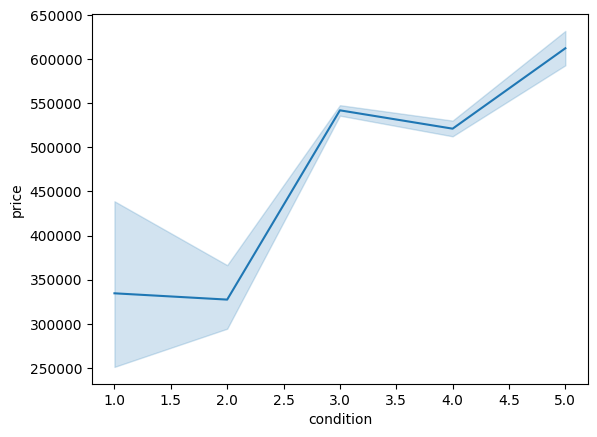

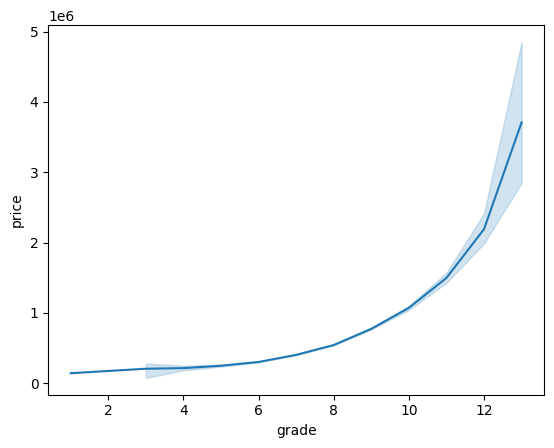

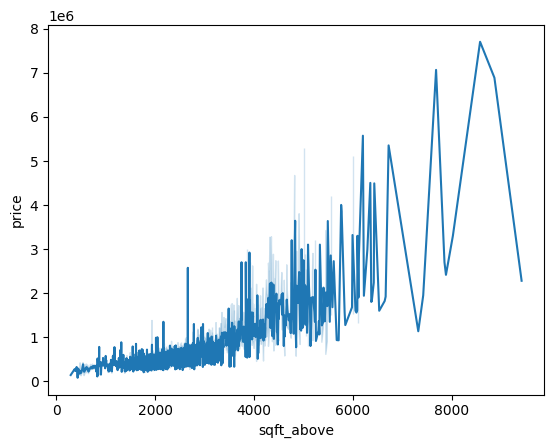

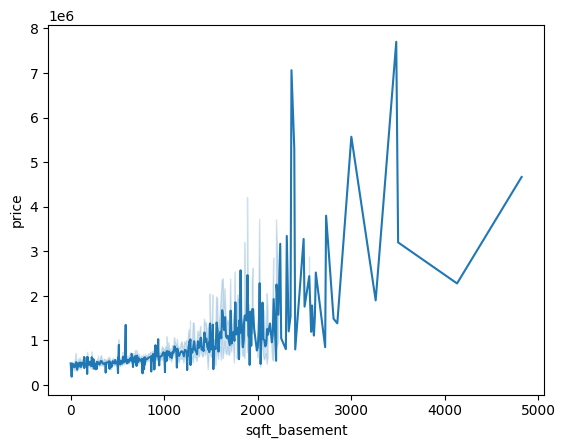

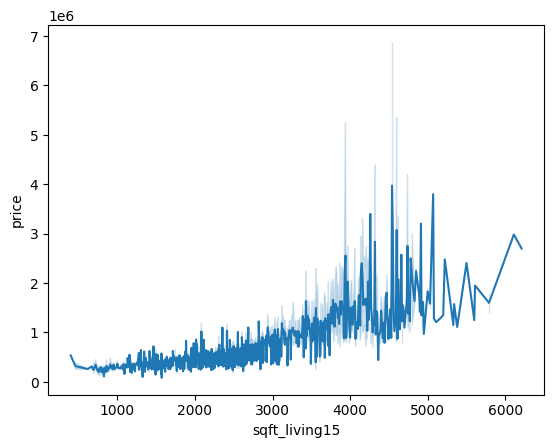

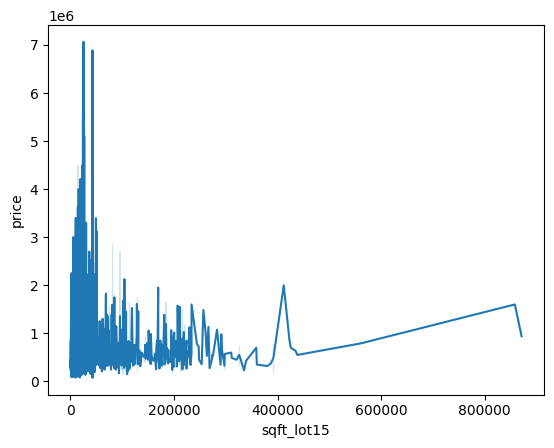

In [223]:
for i in df1:
    sns.lineplot(x=df1[i],y=df['price'])
    plt.show()

Insights

- There is a linear relationship between price and waterfront,condition,Grade and view.
- In year between 1928 to 1932 the price of the house are higher.
- In year between 1940 to 1945 the price of the house was very low.

Text(0.5, 1.0, 'Price of houses over the years houses were renovated')

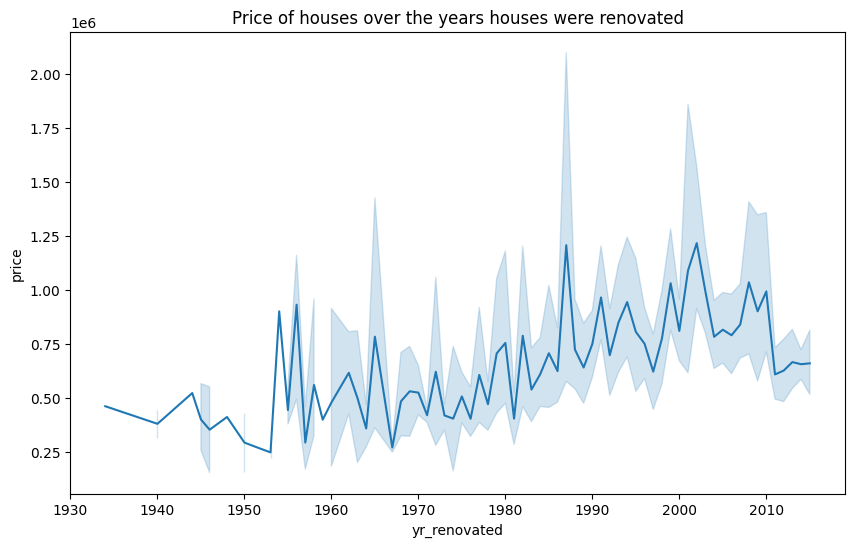

In [224]:
filtered_df = df[(df['yr_renovated'] >= 1900) & (df['yr_renovated'] <= 2015)]
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_df, x='yr_renovated', y='price')
plt.title('Price of houses over the years houses were renovated')

Insight

- After 1940 the price of the house was very low.

- After 1980 price of the house was very high.

In [225]:
cities_with_best_view = df[df['view'] == 4]['grade'].value_counts().head(5)
cities_with_best_view

grade
8     74
9     73
10    65
11    35
7     31
Name: count, dtype: int64

In [226]:
df.groupby('condition')['waterfront'].sum()

condition
1     1
2     1
3    91
4    50
5    20
Name: waterfront, dtype: int64

In [227]:
x= df.groupby('view')['price'].mean()
x

view
0    4.965642e+05
1    8.122808e+05
2    7.924009e+05
3    9.719653e+05
4    1.463711e+06
Name: price, dtype: float64

In [228]:
x1 = x.astype(int)
x1

view
0     496564
1     812280
2     792400
3     971965
4    1463711
Name: price, dtype: int32

Insight

- Grade 7,8,9,10,11 have a great city_view
- Condition of Waterfornt hosues are 3,4,5.

In [229]:
# Data Preprocessing
# Changing the datatype of bathroom
df.bathrooms = df.bathrooms.astype(int)

In [230]:
# changing the floor datatype as int
df.floors = df.floors.astype(int)

In [231]:
df.floors.value_counts()

floors
1    12590
2     8402
3      621
Name: count, dtype: int64

In [232]:
# Feature Selection
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [233]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms          int32
sqft_living        int64
sqft_lot           int64
floors             int32
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [234]:
df2 = df.select_dtypes(include=['int64','float64'])

In [235]:
df2

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,1530,1131,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2310,5813,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,1020,1350,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,1600,2388,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


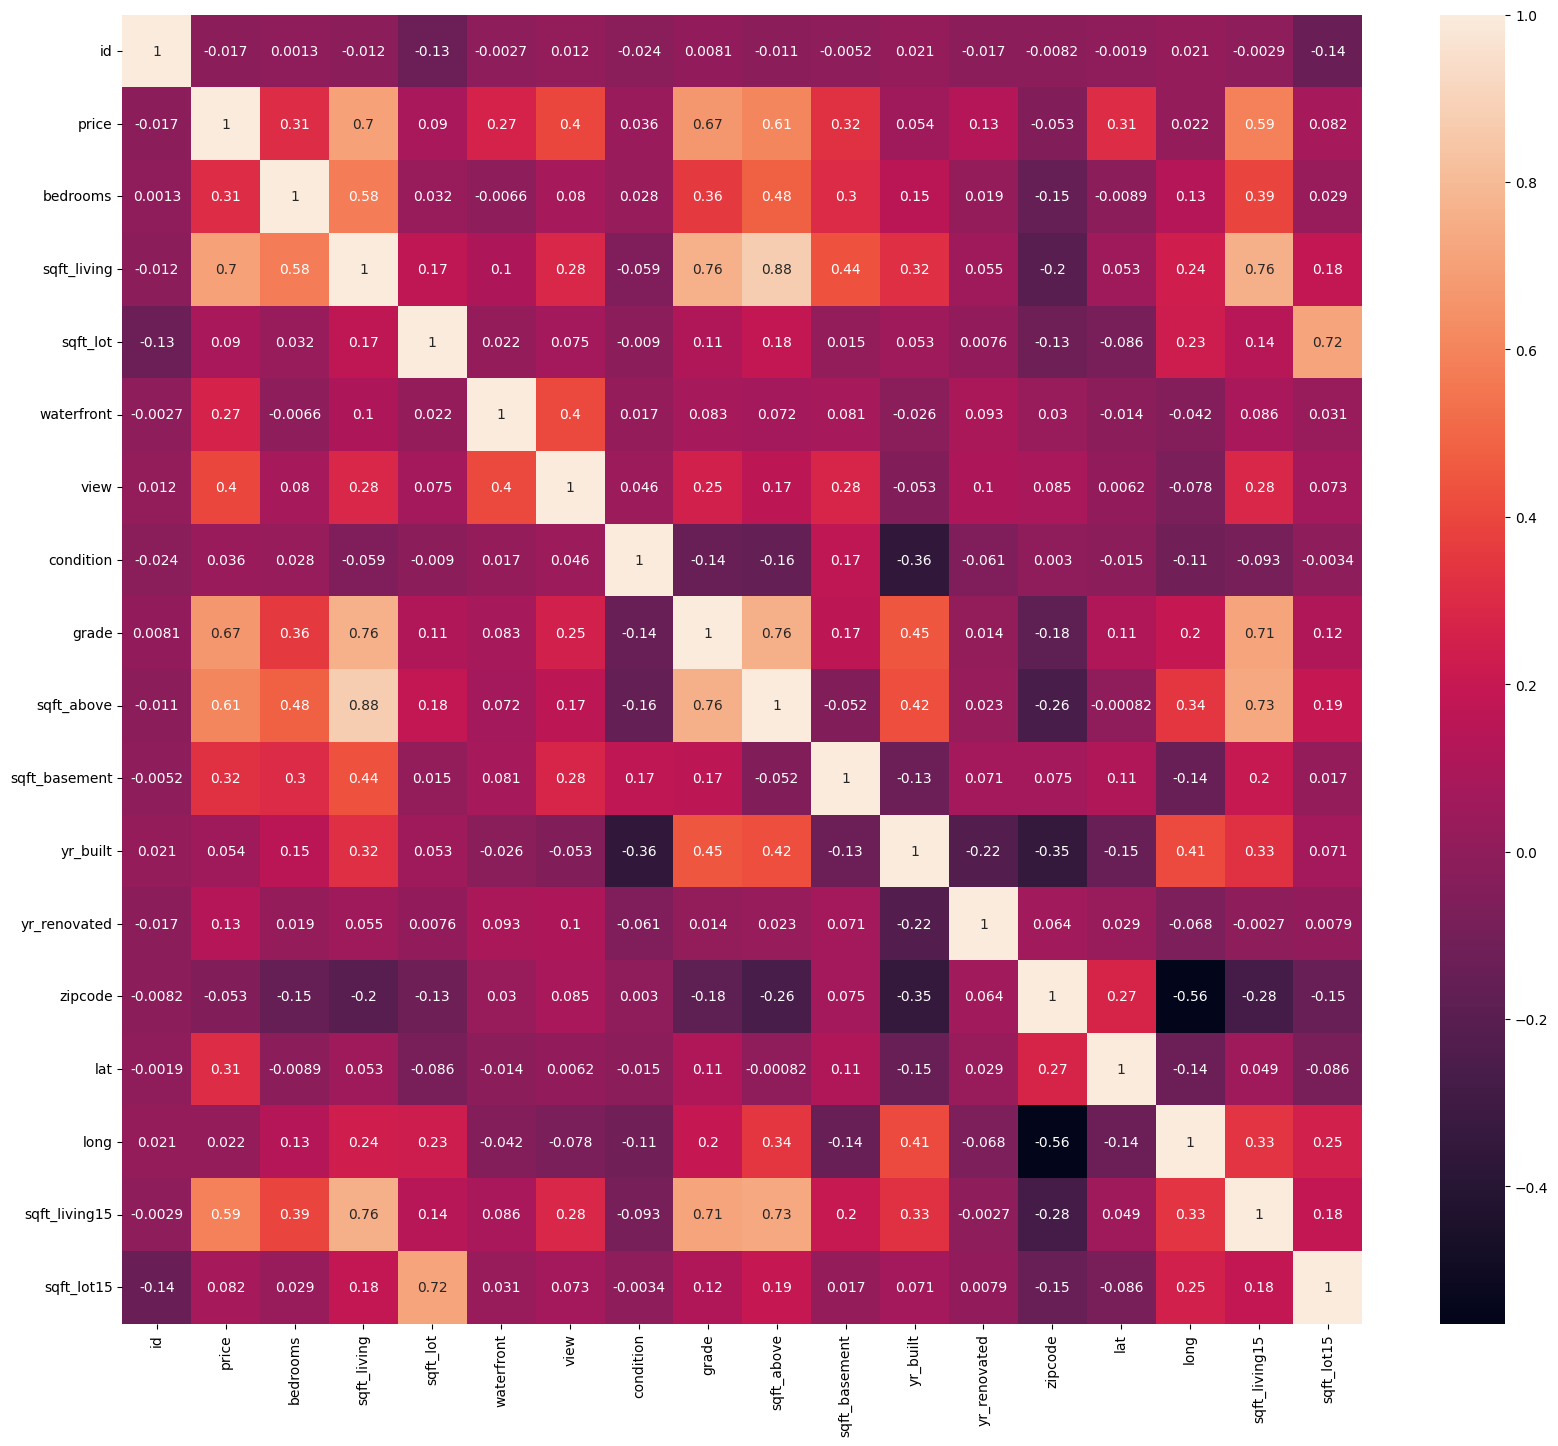

In [236]:
plt.figure(figsize=(20,17))
sns.heatmap(df2.corr(),annot=True);

In [237]:
# Droping irelivent columns
# From the Heatmap we get to know that the square_living_15 and sqft_above have high corelation so droping one column

df.drop(['sqft_living15'],axis=1,inplace=True)

In [238]:
# Droping unique columns
df.drop(['zipcode',"id"],axis=1,inplace=True)

In [239]:
# Featuring Engineering
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_lot15'],
      dtype='object')

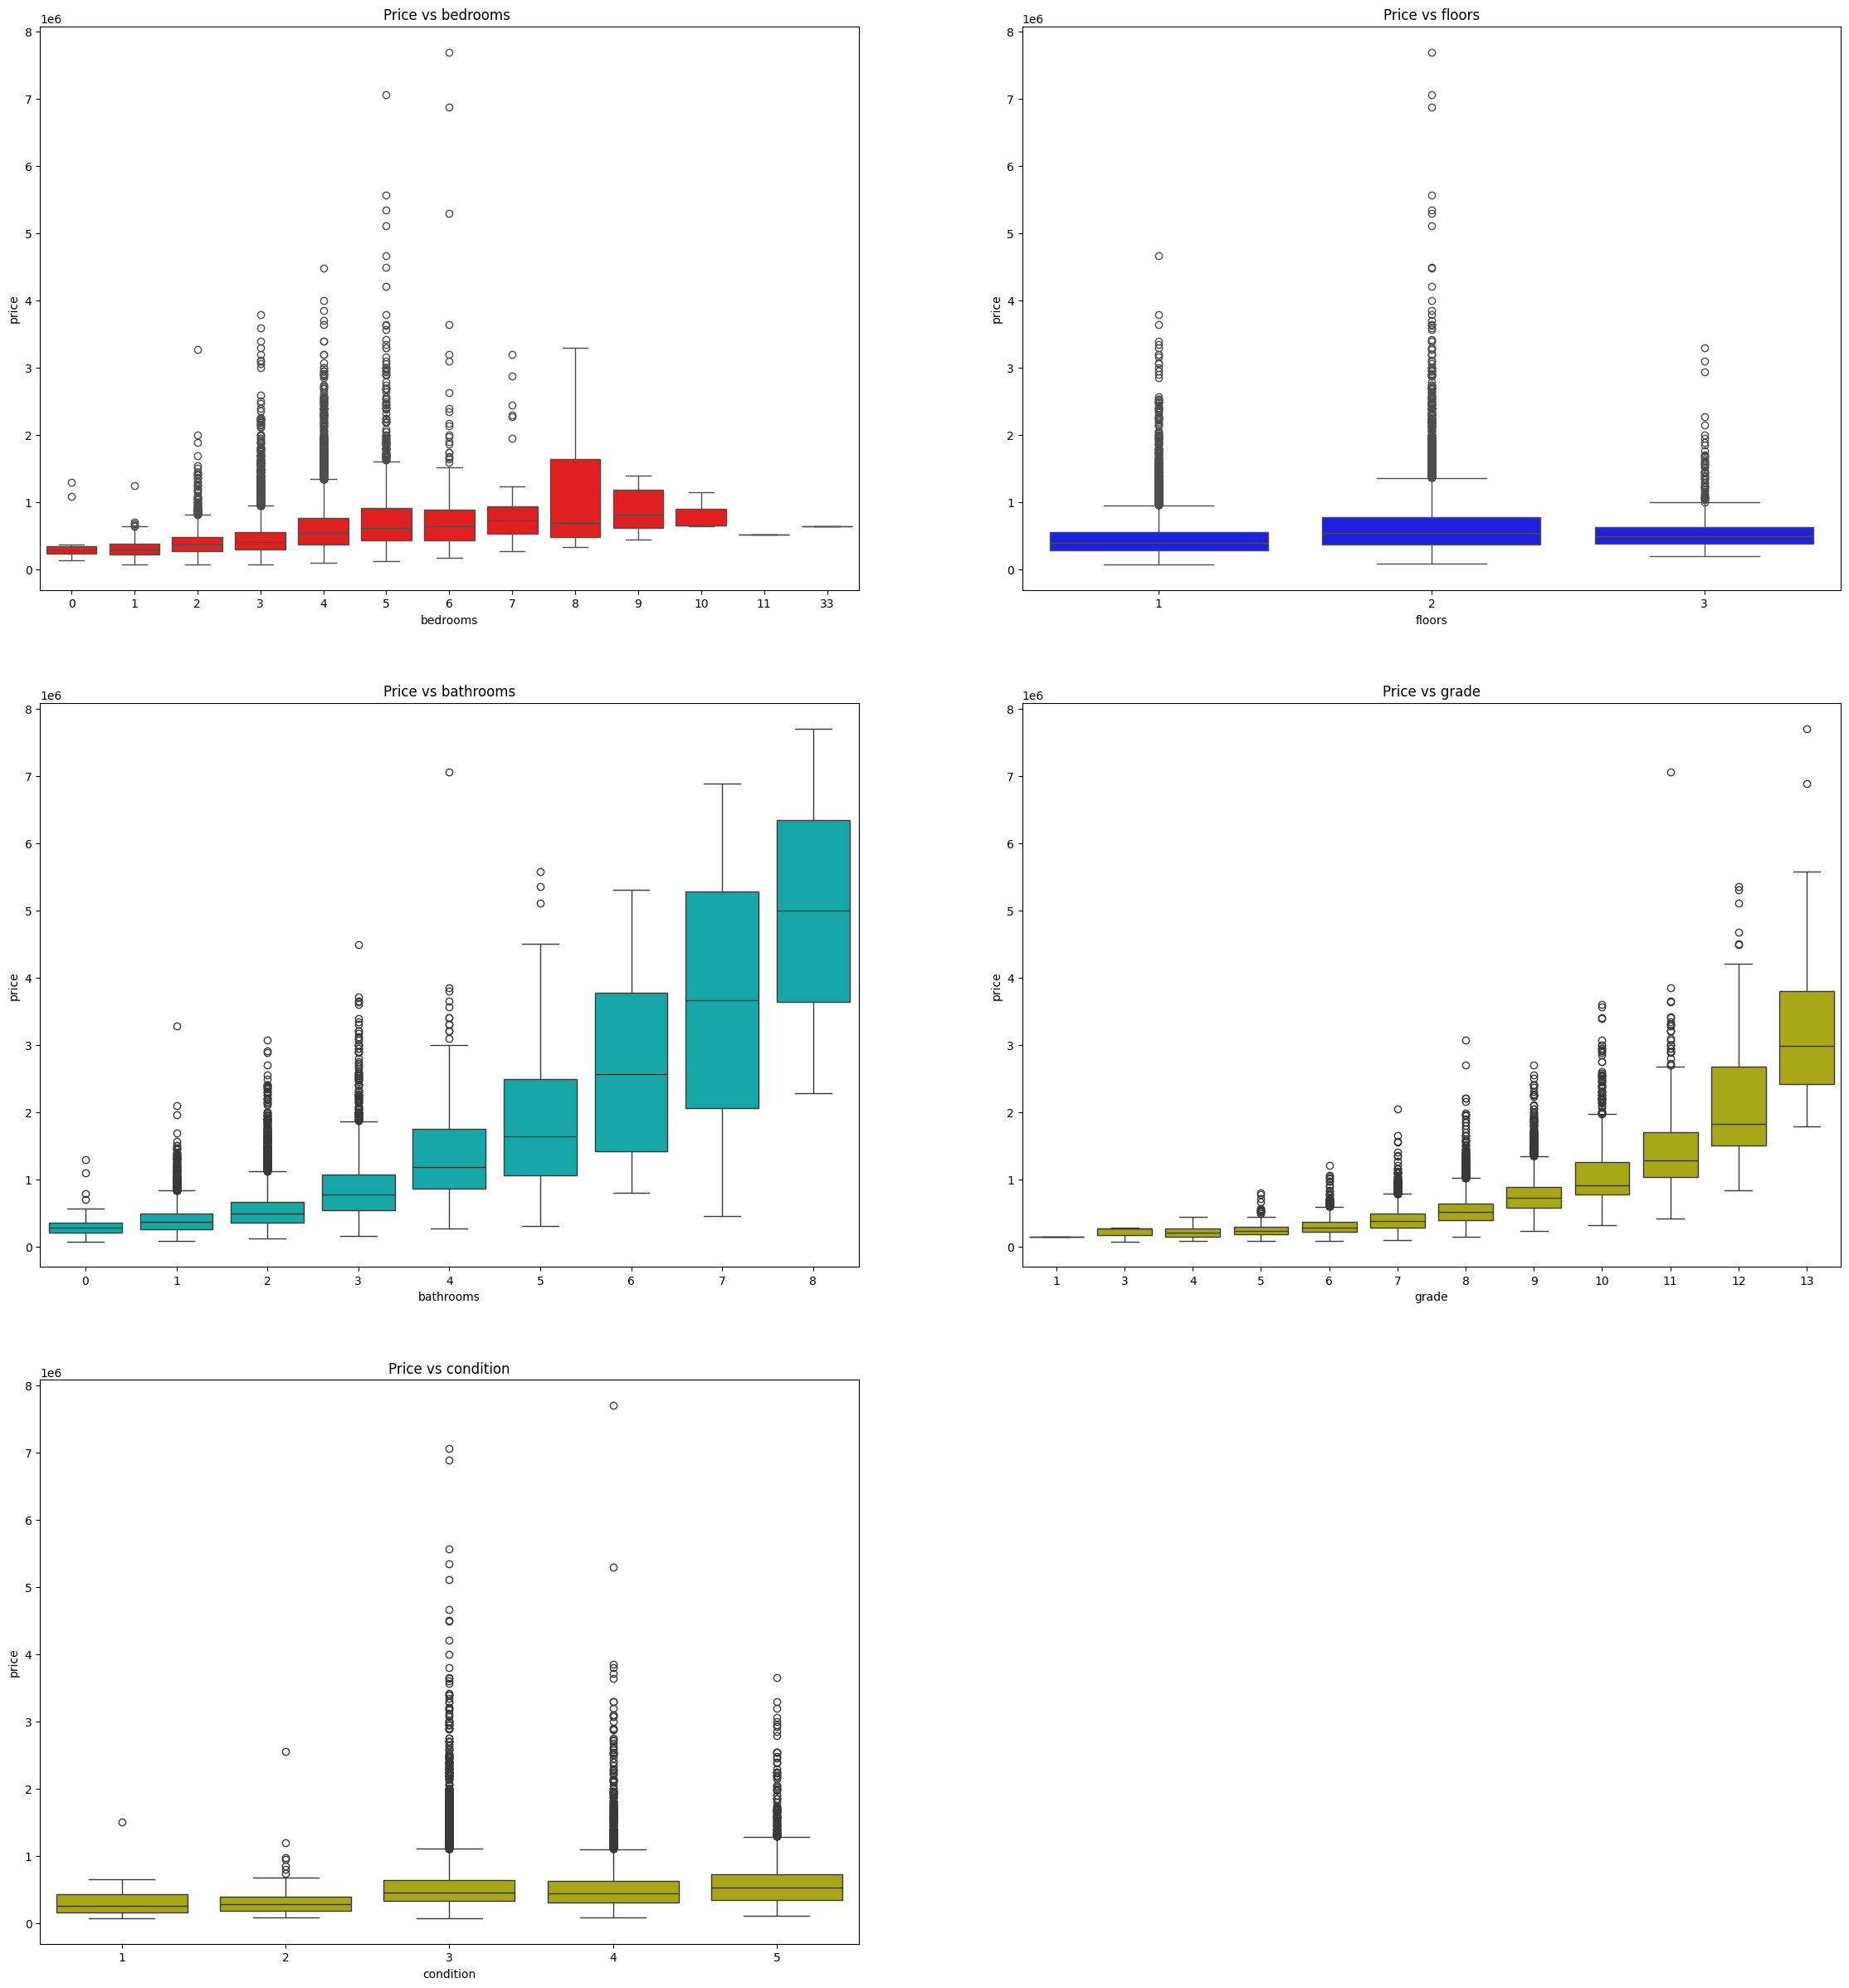

In [240]:
# check the percentile and median base distribution(For visulaising the outliers)
fig= plt.figure(figsize=(28,30))

ax=fig.add_subplot(3,2,1)
sns.boxplot(data=df, x=df["bedrooms"], y=df["price"], hue=None, color='r', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(3,2,2)
sns.boxplot(data=df, x=df["floors"], y=df["price"], hue=None, color='b', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(3,2,3)
sns.boxplot(data=df, x=df["bathrooms"], y=df["price"], hue=None, color='c', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(3,2,4)
sns.boxplot(data=df, x=df["grade"], y=df["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs grade")


ax=fig.add_subplot(3,2,5)
sns.boxplot(data=df, x=df["condition"], y=df["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs condition")

plt.show()

In [241]:
# feature engineer date column, extract year and month for separate new feature
df['date'] = pd.to_datetime(df['date'])
df['year'] =  df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [242]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int32
sqft_living               int64
sqft_lot                  int64
floors                    int32
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
lat                     float64
long                    float64
sqft_lot15                int64
year                      int64
month                     int64
dtype: object

In [243]:
# lineplot for date vs price
import plotly.express as px
px.histogram(df, x='date', y='price', title='Price of houses over the years')

In [244]:
# Analysising House Age
df['house_age'] = df['year'] - df['yr_built']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,year,month,house_age
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,5650,2014,10,59
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,7639,2014,12,63
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,8062,2015,2,82
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,5000,2014,12,49
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,7503,2015,2,28


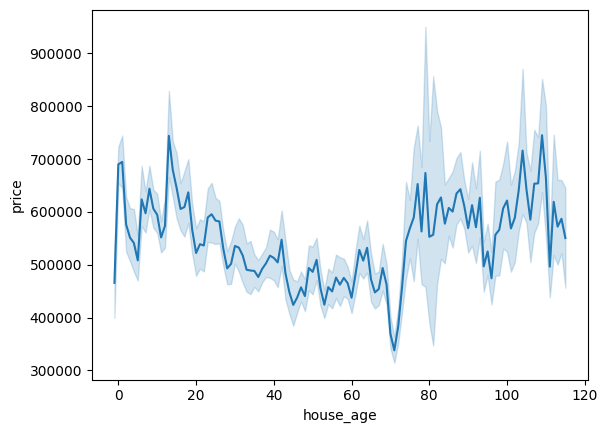

In [245]:
sns.lineplot(data=df,x=df.house_age, y=df.price);

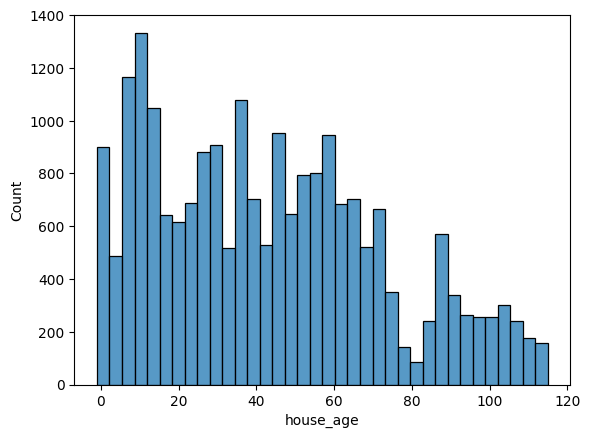

In [246]:
sns.histplot(df.house_age);

Insight

- Price is higher at 22 June 2014 to 28 June 2014, where the sum of price is approx 341M
- After 28 June the price is decreasing till Dec 2014 where the sum of price is approx 95M
- From January 2015 the price is increasing till April 2015, where the sum of the price is approx 318M

In [247]:
# No need to date column so drop the column
df= df.drop(['date'],axis=1)

In [248]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,year,month,house_age
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,5650,2014,10,59
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,7639,2014,12,63
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,8062,2015,2,82
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,5000,2014,12,49
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,7503,2015,2,28


In [249]:
df.shape

(21613, 20)

In [250]:
df.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [251]:
df[(df['bedrooms']==11) | (df['bedrooms']== 33)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,year,month,house_age
8757,520000.0,11,3,3000,4960,2,0,0,3,7,2400,600,1918,1999,47.5560,-122.363,4960,2014,8,96
15870,640000.0,33,1,1620,6000,1,0,0,5,7,1040,580,1947,0,47.6878,-122.331,4700,2014,6,67


In [252]:
df.drop(index=[8757,15870],inplace=True)

In [253]:
df.bathrooms.value_counts()

bathrooms
2    10542
1     8354
3     2227
4      338
0       86
5       48
6       12
8        2
7        2
Name: count, dtype: int64

In [254]:
df[(df['bathrooms']==7) | (df['bathrooms']== 8)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,year,month,house_age
7252,7700000.0,6,8,12050,27600,2,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,8800,2014,10,104
8546,450000.0,9,7,4050,6504,2,0,0,3,7,4050,0,1996,0,47.5923,-122.301,3866,2014,8,18
9254,6885000.0,6,7,9890,31374,2,0,4,3,13,8860,1030,2001,0,47.6305,-122.240,42730,2014,9,13
12777,2280000.0,7,8,13540,307752,3,0,4,3,12,9410,4130,1999,0,47.6675,-121.986,217800,2014,5,15


In [255]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,year,month,house_age
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,5650,2014,10,59
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,7639,2014,12,63
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,8062,2015,2,82
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,5000,2014,12,49
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,7503,2015,2,28


In [256]:
df.house_age.value_counts()

house_age
 9      473
 8      443
 11     433
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: count, Length: 117, dtype: int64

In [257]:
# Create dummy variables for each categorical column 
bedrooms_dum = pd.get_dummies(df['bedrooms'],prefix='bedrooms',drop_first=True,dtype=int)
bathrooms_dum = pd.get_dummies(df['bathrooms'],prefix='bathrooms',drop_first=True,dtype=int)
floors_dum = pd.get_dummies(df['floors'],prefix='floors',drop_first=True,dtype=int)
waterfront_dum = pd.get_dummies(df['waterfront'],prefix='waterfront',drop_first=True,dtype=int)
view_dum = pd.get_dummies(df['view'],prefix='view',drop_first=True,dtype=int)
condition_dum = pd.get_dummies(df['condition'],prefix='condition',drop_first=True,dtype=int)
grade_dum = pd.get_dummies(df['grade'],prefix='grade',drop_first=True,dtype=int)
year_dum = pd.get_dummies(df['year'],prefix='year',drop_first=True,dtype=int)

In [258]:
# Combine all dummy variables into a single DataFrame
dummy_df = pd.concat([bedrooms_dum, bathrooms_dum, floors_dum, waterfront_dum, view_dum, condition_dum, grade_dum, year_dum],axis=1)

In [259]:
# dConcatenate with the original DataFrame (excluding original categorical columns)
res_df = pd.concat([df.drop(columns=['bedrooms','bathrooms','floors','waterfront','view','condition','grade','year']),dummy_df],axis=1)

In [260]:
res_df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,month,house_age,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,floors_2,floors_3,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,year_2015
0,221900.0,1180,5650,1180,0,1955,0,47.5112,-122.257,5650,10,59,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,538000.0,2570,7242,2170,400,1951,1991,47.7210,-122.319,7639,12,63,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,180000.0,770,10000,770,0,1933,0,47.7379,-122.233,8062,2,82,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,604000.0,1960,5000,1050,910,1965,0,47.5208,-122.393,5000,12,49,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,510000.0,1680,8080,1680,0,1987,0,47.6168,-122.045,7503,2,28,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [261]:
# Drop some columns 
res_df.drop(columns=['sqft_lot','sqft_above','yr_built','yr_renovated','lat','long','sqft_lot15','month'],inplace=True,axis=1)

In [262]:
res_df.head()

,price,sqft_living,sqft_basement,house_age,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,floors_2,floors_3,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,year_2015
0,221900.0,1180,0,59,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,538000.0,2570,400,63,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,180000.0,770,0,82,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,604000.0,1960,910,49,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,510000.0,1680,0,28,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [263]:
# Min-Max Scaling
# Min-Max Scaling scales the data to a fixed range, usually between 0 and 1.

In [264]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [265]:
# Fit and transform the data
res_df[['sqft_living','sqft_basement','house_age']] = scaler.fit_transform(res_df[['sqft_living','sqft_basement','house_age']])

In [266]:
res_df.head()

,price,sqft_living,sqft_basement,house_age,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,floors_2,floors_3,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,year_2015
0,221900.0,0.067170,0.000000,0.517241,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,538000.0,0.172075,0.082988,0.551724,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,180000.0,0.036226,0.000000,0.715517,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,604000.0,0.126038,0.188797,0.431034,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,510000.0,0.104906,0.000000,0.250000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


Model Creation

In [267]:
x= df.drop(['price'],axis=1)
y=df['price']

In [268]:
# Split into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Model Building With linear regression

In [269]:
# Initialize the LinearRegression
model = LinearRegression()
model

LinearRegression()

In [270]:
# Fit the model
model.fit(x_train,y_train)

LinearRegression()

In [271]:
# Make predictions for train dataset
y_train_pred = model.predict(x_train)

In [272]:
# Evaluate the model for train dataset
print(mean_absolute_error(y_train,y_train_pred))
print(r2_score(y_train,y_train_pred))

125365.86942013016
0.6964668196579454


In [273]:
# Make prediction for test/unseen dataset
y_test_pred = model.predict(x_test)

In [274]:
# Evaluate the model for test dataset
print(mean_absolute_error(y_test,y_test_pred))
print(r2_score(y_test,y_test_pred))

126252.15171026897
0.7047429257866565


Model Building with Decision tree Regressor

In [275]:
# Initialize the DecisionTreeRegressor
model = DecisionTreeRegressor()

In [276]:
# Fit the model
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [277]:
# Make prediction for train Dataset
y_train_pred = model.predict(x_train)
y_train_pred

array([293000., 225000., 846450., ..., 575000., 245000., 485000.])

In [278]:
# Evaluate The Model for train dataset
print(mean_absolute_error(y_train,y_train_pred))
print(r2_score(y_train,y_train_pred))

0.11840583063396576
0.9999999990842979


In [279]:
# Make prediction for test/unseen dataset
y_test_pred = model.predict(x_test)

In [280]:
# Evaluate the mdoel for test dataset
print(mean_absolute_error(y_test,y_test_pred))
print(r2_score(y_test,y_test_pred))

103857.9234328013
0.6975567901103884


In [281]:
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Set up the hyperparameter grid
grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_leaf_nodes': [None, 5, 10, 20],
    'splitter': ['best', 'random']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model,grid,cv=5)

In [282]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'splitter': ['best', 'random']})

In [283]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_leaf=6, min_samples_split=10)

In [284]:
best_model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_leaf=6)
best_model

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_leaf=6)

In [285]:
best_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_leaf=6)

In [286]:
# Make prediction for train dataset
y_train_pred = best_model.predict(x_train)

In [287]:
# Evaluation
print(mean_absolute_error(y_train,y_train_pred))
print(r2_score(y_train,y_train_pred))

63709.33537783415
0.9081710665307047


In [288]:
# Make prediction for test dataset
y_test_pred = best_model.predict(x_test)

In [289]:
# Evaluate the test dataset
print(mean_absolute_error(y_test,y_test_pred))
print(r2_score(y_test,y_test_pred))

89748.605228422
0.7815358800386087
